# Predicting the progression of diabetes using least-squares regression

The **diabetes** data set described in lecture can be obtained as a single file, `diabetes-data.csv`, from the course website. We obtained it at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

Before you start on this notebook, install `diabetes-data.csv` in the same directory. We will walk through some of the examples from lecture as well as giving you some problems to solve.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)
np.random.seed(123)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

#from pycaret.classification import *
from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("diabetes-data.csv")

In [3]:
df

,age,sex,bodymassindex,bloodpressure,serum1,serum2,serum3,serum4,serum5,serum6,y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    int64  
 1   sex            442 non-null    int64  
 2   bodymassindex  442 non-null    float64
 3   bloodpressure  442 non-null    float64
 4   serum1         442 non-null    int64  
 5   serum2         442 non-null    float64
 6   serum3         442 non-null    float64
 7   serum4         442 non-null    float64
 8   serum5         442 non-null    float64
 9   serum6         442 non-null    int64  
 10  y              442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [5]:
df.describe(include='all')

,age,sex,bodymassindex,bloodpressure,serum1,serum2,serum3,serum4,serum5,serum6,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [6]:
df.shape

(442, 11)

In [7]:
df.columns

Index(['age', 'sex', 'bodymassindex', 'bloodpressure', 'serum1', 'serum2',
       'serum3', 'serum4', 'serum5', 'serum6', 'y'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

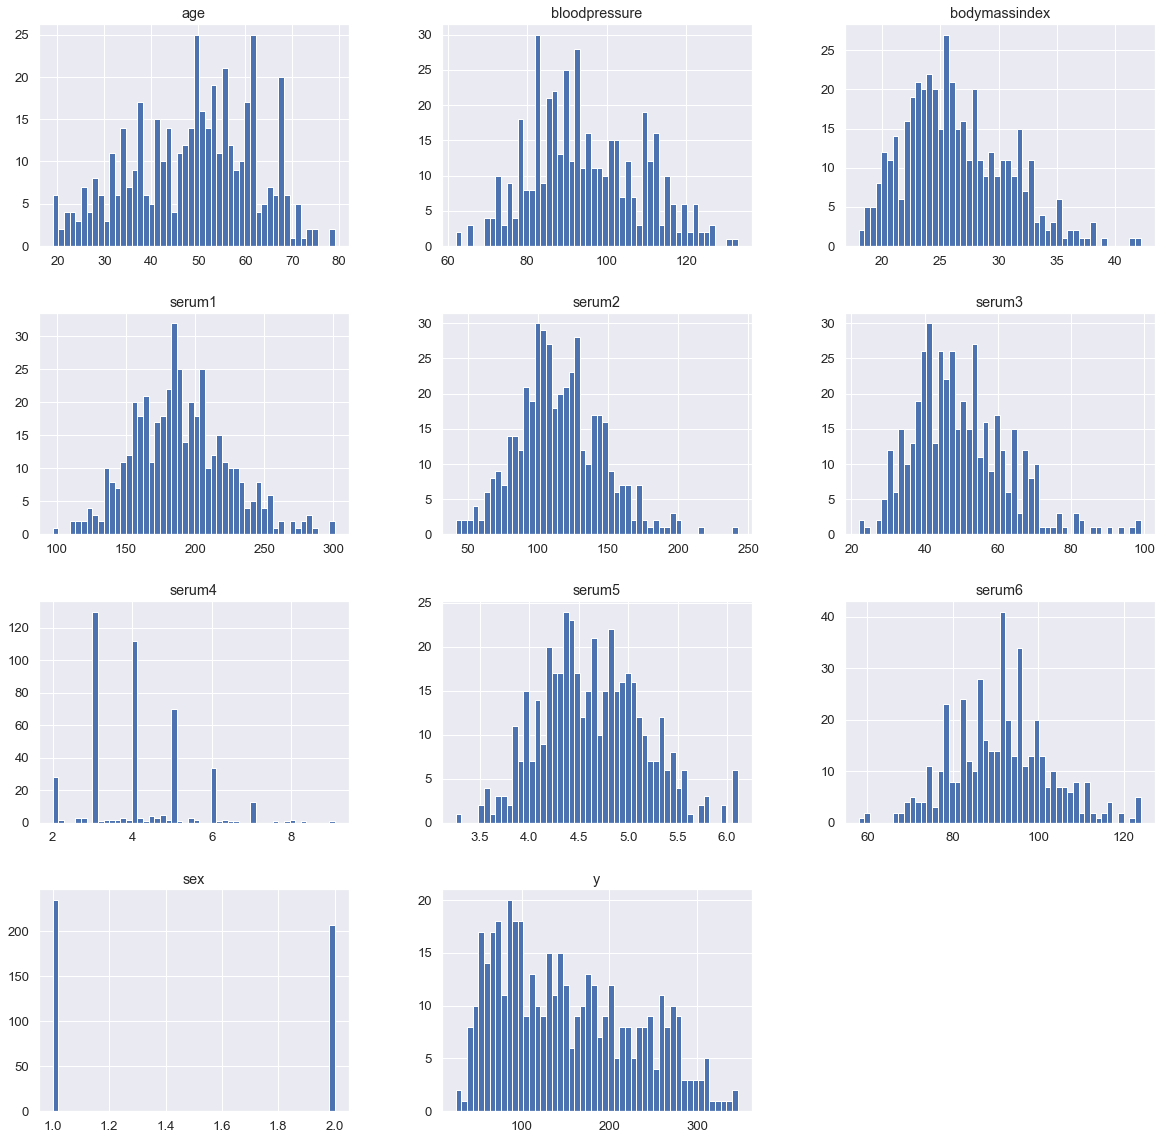

In [8]:
df.hist(bins=50, figsize=(20,20));

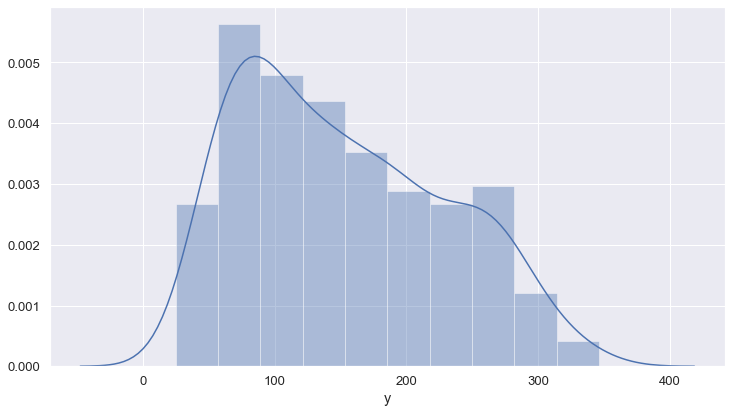

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.y)

plt.tight_layout()
plt.show()

In [10]:
df.corr()

,age,sex,bodymassindex,bloodpressure,serum1,serum2,serum3,serum4,serum5,serum6,y
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bodymassindex,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bloodpressure,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
serum1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
serum2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
serum3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
serum4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
serum5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
serum6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


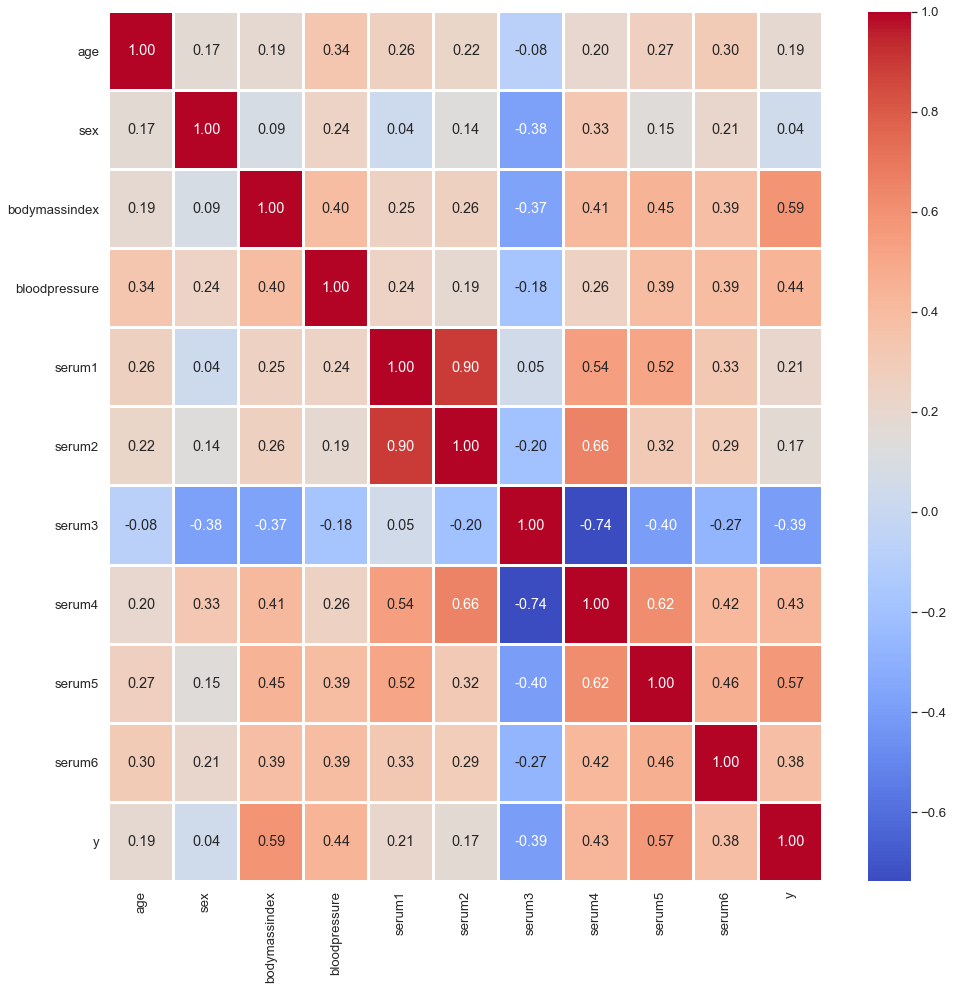

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

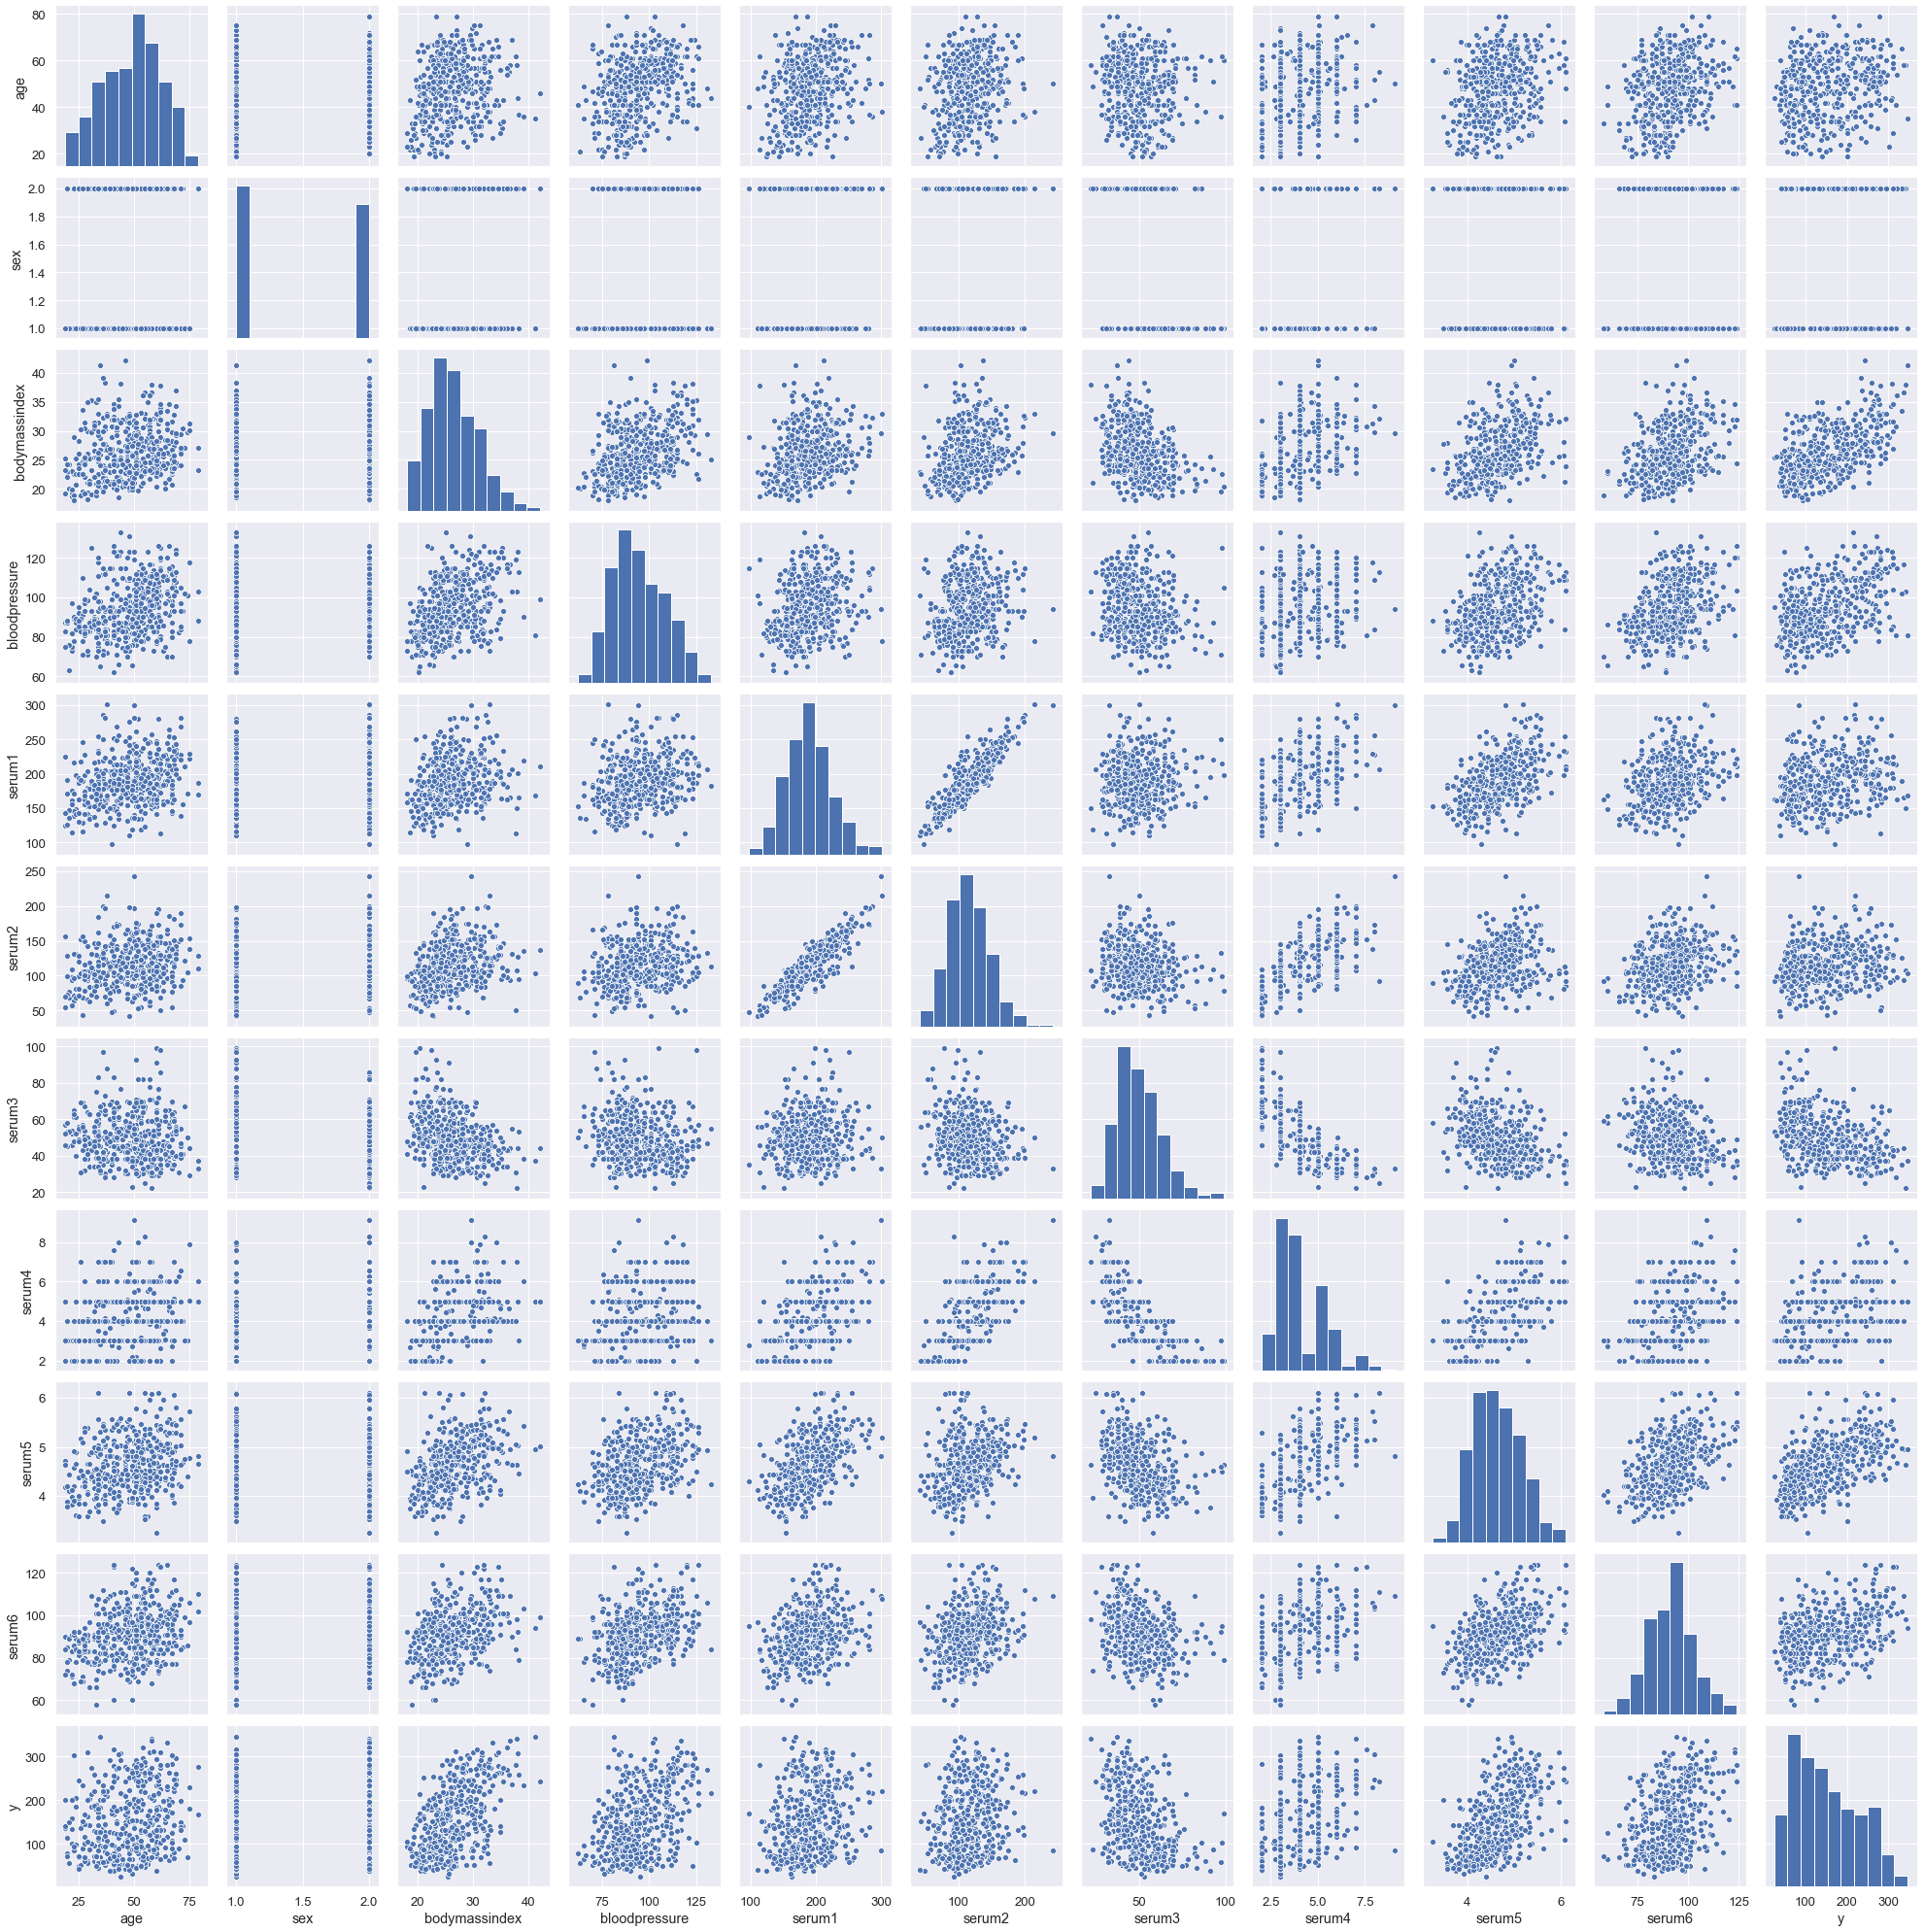

In [12]:
sns.pairplot(df)
plt.show()

### Treat Missing Values

In [13]:
df.isnull().sum()

age              0
sex              0
bodymassindex    0
bloodpressure    0
serum1           0
serum2           0
serum3           0
serum4           0
serum5           0
serum6           0
y                0
dtype: int64

### Model Training

### Using PyCaret

In [14]:
exp_reg = setup(data = df, target = 'y', session_id=123, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(442, 11)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,44.902400,3087.079200,55.293500,0.449200,0.422600,0.403200
1,Linear Regression,44.890600,3087.123800,55.290700,0.449000,0.423800,0.403200
2,Lasso Regression,45.350400,3102.101500,55.439000,0.448700,0.421500,0.406600
3,Bayesian Ridge,45.211200,3099.997600,55.429900,0.448200,0.421300,0.405600
4,Huber Regressor,44.993200,3113.020300,55.497700,0.442700,0.426800,0.403700
5,TheilSen Regressor,45.246800,3152.178300,55.856900,0.435400,0.421000,0.397800
6,Elastic Net,47.092400,3231.325800,56.606500,0.430300,0.430000,0.427000
7,Passive Aggressive Regressor,45.519400,3264.352200,56.708200,0.414800,0.427300,0.399700
8,Random Sample Consensus,46.174200,3313.059000,57.147400,0.406100,0.451300,0.411800
9,AdaBoost Regressor,47.415900,3404.779600,58.087000,0.396800,0.442900,0.439600


In [16]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.1765,3276.1708,57.2378,0.3171,0.4545,0.4718
1,47.3337,3465.2043,58.8660,0.3258,0.4584,0.4092
2,37.8272,2370.5568,48.6884,0.5735,0.3590,0.3288
3,53.7608,4095.8449,63.9988,0.4236,0.5512,0.6045
4,38.2807,2229.3582,47.2161,0.5547,0.3055,0.2643
5,42.7723,2912.0452,53.9634,0.4809,0.4619,0.4160
6,43.4545,2678.3239,51.7525,0.6573,0.3716,0.3267
7,51.3384,4034.9194,63.5210,0.3374,0.4589,0.4465
8,43.8108,3180.3670,56.3947,0.4032,0.4405,0.4062
9,43.1507,2628.4470,51.2684,0.4164,0.3770,0.3578


In [17]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


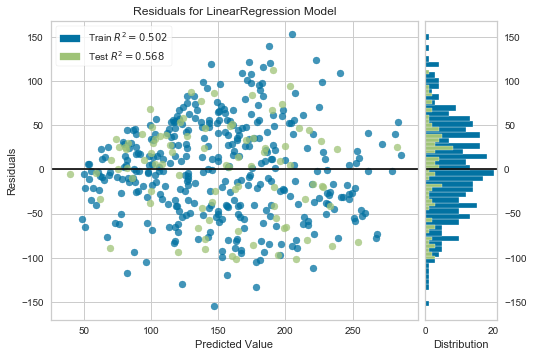

In [18]:
plot_model(lr)

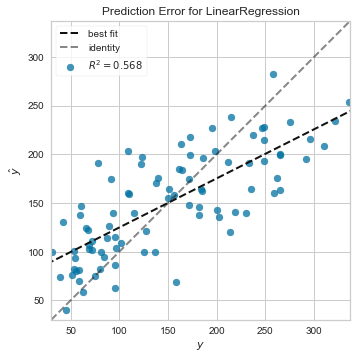

In [19]:
plot_model(lr, plot = 'error')

In [20]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,42.8761,2724.2581,52.1944,0.5676,0.3973,0.3761


,age,bodymassindex,bloodpressure,serum1,serum2,serum3,serum4,serum5,serum6,sex_1,y,Label
0,0.113172,-0.039834,0.170313,-0.090841,-0.330467,-0.061029,-0.054499,0.807186,-0.283906,0.0,185,162.2642
1,-0.192307,-0.379729,-0.698268,-0.437974,0.255471,-1.531667,1.497104,0.005729,0.412757,0.0,150,155.4884
2,0.953240,0.821235,0.966513,0.140581,-0.508223,0.171178,-0.263966,1.352415,1.196502,1.0,246,227.0097
3,-1.337853,0.753256,-0.481123,-0.640468,-0.396303,-0.138431,-0.054499,-0.545633,-1.154734,1.0,184,164.6354
4,1.105979,-0.515688,1.183659,-0.148697,-0.106626,-0.448039,-0.054499,0.561689,-0.806403,0.0,110,158.7898
...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.495021,2.316775,1.328422,0.285220,-0.692563,-0.525441,0.434256,2.086414,0.499840,1.0,258,282.9052
85,0.876870,0.254742,0.821750,1.153052,0.933578,0.093776,-0.054499,0.958777,-0.022657,0.0,235,164.8041
86,1.335088,0.368041,0.459841,0.169509,0.452978,-0.757647,0.721302,0.418531,0.238591,1.0,173,199.4065
87,-0.497786,-1.376756,-1.711613,-0.814035,-1.127079,1.254806,-1.606102,-0.780589,-0.893485,1.0,59,70.1469
